# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
(rumore zero e rumore bianco, scorrelato)

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

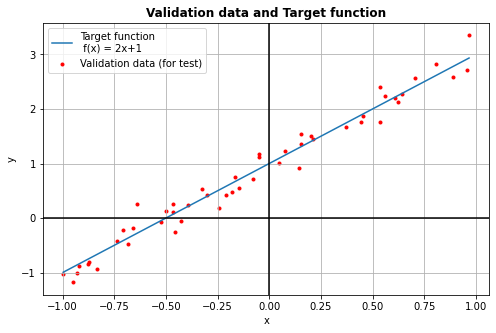

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================================
# Define parameters of an ideal linear function.
# We want to predict them after
# ==============================================

# parametri da indagare
N_epochs = 50
N_train = 2000 # <<< train
N_valid = 50 # <<< test
Sigma = 0.2

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# ==============================================
# Generate input data, deviating 
# from ideal behaviour [random noise - sigma]
# ==============================================

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)        # training inputs
x_valid = np.random.uniform(-1, 1, N_valid)        # ...
x_valid.sort()
y_target = m * x_valid + b                         # target linear function

sigma = Sigma                                      # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # array of measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma) # array of measures from which we want to test prediction ability of the NN

# plot validation and target dataset
plt.figure(figsize=(8,5))
plt.plot(x_valid, y_target, label = "Target function\n f(x) = 2x+1")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data (for test)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and Target function", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Use PYTHON 3.9.12

# ==============================================
# INITIALIZE Neural Network (Sequential) model:
# a single neuron can make the fitting job, so
# i use only one layer on one neuron.
# ==============================================

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))   # nota: qui non c'è una funzione di attivazione (non lineare), 
                                        # mentre è necessario aggiungerla per i punti successivi (esplorare quali vanno meglio)

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# ==============================================
# Get a summary of our composed model
# ==============================================
# model.summary()

# ==============================================
# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training 
# pairs. The optimizer finds the best weights 
# minimizing the Mean Square Error loss function 
# ==============================================

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
history = model.fit(    x=x_train, y=y_train, 
                        batch_size=32, epochs=N_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle=True,                        
                        validation_data=(x_valid, y_valid))

Guessed parameters
Slope   m = [[2.0147855]]
Interc. q = [0.9911202]

TEST DATA evaluation
Test loss:      0.038043394684791565
Test accuracy:  0.038043394684791565

EXACT CURVE evaluation
Test loss:      0.00017612232477404177
Test accuracy:  0.00017612232477404177


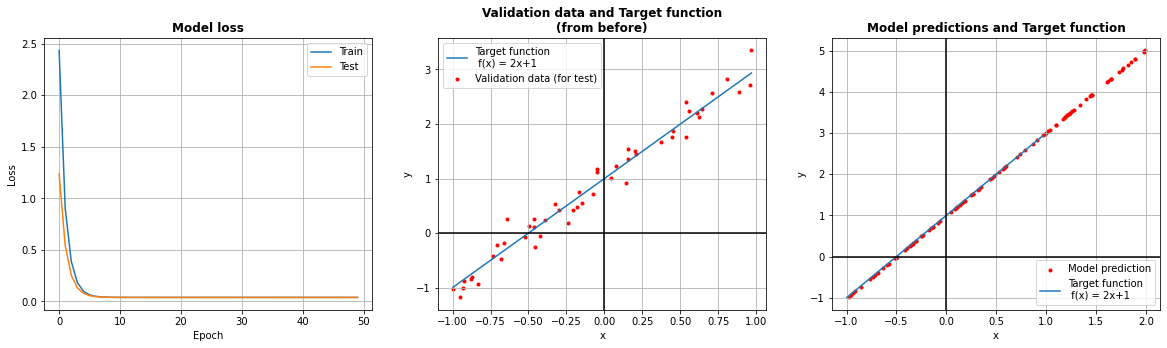

In [62]:
# ==============================================
# Return Weights and Biases (w <-> m=2)(b <-> q=1)
# ==============================================

print("Guessed parameters")
w,b = model.get_weights() # hope they are similar to m=2 and q=1.
                          # Was the fit successful?
print("Slope   m = "+str(w))
print("Interc. q = "+str(b))
print()

# ==============================================
# EVALUATE MODEL
# ==============================================

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

# ==============================================
# Training history
# ==============================================

plt.figure(figsize=(20,5))

# Plot training & validation loss values
plt.subplot(1,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
#plt.show()
#plt.savefig("imgs/sgm_"+str(sigma)+".png")

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

# generate predictions
x_predicted = np.random.uniform(-1, 2, 100) 
y_predicted = model.predict(x_predicted)

# (re)plot validation and target dataset
plt.subplot(1,3,2)
plt.plot(x_valid, y_target, label = "Target function\n f(x) = 2x+1")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data (for test)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and Target function\n(from before)", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()

# plot
plt.subplot(1,3,3)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
plt.plot(x_valid, y_target, label = "Target function\n f(x) = 2x+1")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model predictions and Target function", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

**OSSERVAZIONI:**

provo a tenere un numero basso di epoche (= chiedere alla rete di imparare velocemente). (ntrain = 500)
- con $\sigma = 0$, la predizione è scarsa, perchè la model loss del test non ha ancora fatto tempo a convergere a quella di train, nè a stabilizzarsi sul minimo.
- con $\sigma = 0.2$ la situazione migliora, la predizione è più accurata. La model loss è più convergiuta anche perchè partiva in origine meno lontana da quella di test.
- con $\sigma = 0.3$ la situazione sembra ottima. La differena inizale di loss tra test e train è ridotta, e con le epoche si riduce ulteriormente. Nello specifico però si nota che tra la 2a e la 3a epoca, la loss di test supera quella di train per restare sopra, come a indicare un "loss offset" (una sorta di errore sistematico).
- con $\sigma = 0.5$ simile a prima ma l'offset aumenta.

NOTA: tutte osservazioni buggate dal fatto che keras ha un generatore di numeri casuali che continua ad andare avanti ad ogni run, e le oscillazioni dei risultati erano dominate da questa cosa, soprattutto per sigma > 0.5. In linea di massima però l'osservazione è corretta: l'aumento di sigma può introdurre una specie di offset.

osservazione simile vale anche per un numero maggiore di epoche.

Naturalmente con $\sigma = 0$, all'aumentare delle epoche a un certo punto il fit tende alla perfezione. Il problema di tenere sigma nulla viene però a galla quando si ha a che fare con del rumore e una rete di tantissimi nodi che rischia di overfittare del rumore: in quel caso sigma dovrà essere dell'ordine di grandezza del rumore (?) o più, per dominare su quelle oscillazioni.

Aumentando il numero di punti di train, come ci si poteva aspettare, la rete apprnede più velocemente, ovvero si osserva ad esempio che il minimo della model loss si raggiunge in circa 20 epoche con N_train = 500, mentre si raggiunge in circa 10 epoche con N_train = 1000. Può convenire investire sul training piuttosto che sul numero di epoche, dal momento che in un caso come questo, sono le epoche ad aumentare il tempo di esecuzione del programma.